# Red Neuronal 2 con TensorFLow y Keras

Descripción: En esta red probaremos el comportamiento con menos columnas, ya que las variables se convirtieron en categoricas

Importamos las librerias necesarias

In [1]:
import tensorflow as tf
import keras
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

Importo el Dataframe de train ajustado 

In [5]:
df_LE = pd.read_csv("../DF_LE_RN/df_train_LE.csv")

Verifico las columnas

In [6]:
df_LE.columns

Index(['Available Extra Rooms in Hospital', 'Department', 'doctor_name',
       'staff_available', 'gender', 'Type of Admission', 'Severity of Illness',
       'health_conditions', 'Insurance', 'Long_duration', 'Age_le'],
      dtype='object')

In [7]:
df_LE.shape

(410000, 11)

Escojo una muestra de 10000 valores aleatorios del total de los datos, separo en <font color='yellow'>df_LE_Entrada</font> y <font color='yellow'>df_LE_Salida</font> donde se encuentra la columna  'Long_duration' que contiene el dato que se quiere entrenar a para poder predecrilo

In [8]:
df_LE_muestra = df_LE.sample(n= 10000)

In [9]:
df_LE_muestra_Entrada = df_LE_muestra[['Department', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Insurance', 'Age_le']]

In [11]:
df_LE_muestra_Salida = df_LE_muestra['Long_duration']

Creamos la red neuronal y entrenamos la red neuronal, tiene 5 capas ocultas y se entreno con LabelEncoder de las columnas <font color='yellow'>''Department', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Insurance', 'Age_le' </font>.
>En este caso aumentar la cantidad de capas aporta ruido, por tanto la cantidad ideal sería de 5 capas



In [12]:
oculta1 = tf.keras.layers.Dense(units = 20 , input_shape=(7,))
oculta2 = tf.keras.layers.Dense(units = 19)
oculta3 = tf.keras.layers.Dense(units = 18)
oculta4 = tf.keras.layers.Dense(units = 17)
oculta5 = tf.keras.layers.Dense(units = 16)
salida = tf.keras.layers.Dense(units = 1)
modelo =tf.keras.Sequential([oculta1,oculta2, oculta3,oculta4,oculta5, salida])

In [14]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.00001),
    loss = 'mean_squared_error'
)

In [15]:
print('Comenzando el entrenamiento')
historial = modelo.fit(df_LE_muestra_Entrada.values, df_LE_muestra_Salida.values.reshape(-1,1), epochs= 500, verbose=True)
print('Listo')

Comenzando el entrenamiento
Epoch 1/500
313/313 [==============================] - 4s 2ms/step - loss: 0.3160
Epoch 2/500
313/313 [==============================] - 1s 2ms/step - loss: 0.2668
Epoch 3/500
313/313 [==============================] - 1s 2ms/step - loss: 0.2464
Epoch 4/500
313/313 [==============================] - 1s 2ms/step - loss: 0.2376
Epoch 5/500
313/313 [==============================] - 1s 2ms/step - loss: 0.2336
Epoch 6/500
313/313 [==============================] - 1s 2ms/step - loss: 0.2315
Epoch 7/500
313/313 [==============================] - 1s 2ms/step - loss: 0.2300
Epoch 8/500
313/313 [==============================] - 1s 2ms/step - loss: 0.2289
Epoch 9/500
313/313 [==============================] - 1s 2ms/step - loss: 0.2280
Epoch 10/500
313/313 [==============================] - 1s 2ms/step - loss: 0.2272
Epoch 11/500
313/313 [==============================] - 1s 2ms/step - loss: 0.2265
Epoch 12/500
313/313 [==============================] - 1s 2ms/step 

Vemos el historial de perdida del modelo

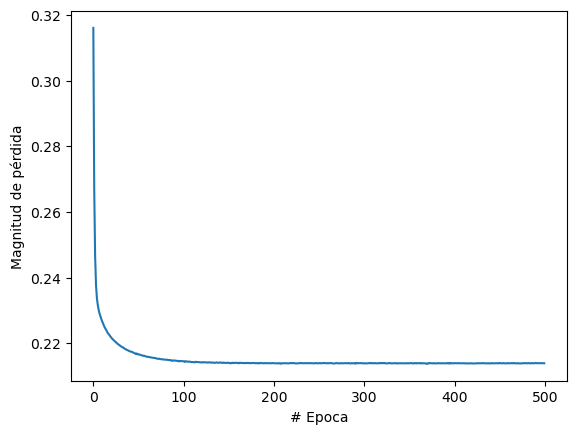

In [16]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history['loss'])

Hacemos prediciones con la red neuronal entrenada

In [19]:
df_LE_prueba = df_LE.sample(n=90000)
df_LE_prueba_Entrada = df_LE_prueba[['Department', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Insurance', 'Age_le']]
df_LE_prueba_Salida = df_LE_prueba['Long_duration']

In [23]:
correcta = df_LE_prueba_CORRECTA.values.reshape(-1,1)

In [20]:
print("Predición de unos datos")
resultado = modelo.predict(df_LE_prueba_Entrada.values)
print("Resuelto")

Predición de unos datos
Resuelto


In [21]:
resultado = np.round(resultado, decimals=0)

In [24]:
print(classification_report(df_LE_prueba_Salida, resultado))

              precision    recall  f1-score   support

           0       0.42      0.12      0.18     33863
           1       0.63      0.90      0.74     56137

    accuracy                           0.61     90000
   macro avg       0.52      0.51      0.46     90000
weighted avg       0.55      0.61      0.53     90000



In [25]:
roc_auc_score(y_true=correcta, y_score=resultado)

0.5001927928184375

El modelo no es mejor respecto a la red neuronal 1, tomando como referencias el ROC AUC SCORE, este se encuentra más cerca de 0,5 por lo que podemos inferir que empeoró el modelo.
> When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is predicting random class or constant class for all the data points. Fuente: `https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/` 

Hacemos ajuste de los datos para generar la predicción tomando con la nueva Red Neuronal

In [27]:
df_test_LE = pd.read_csv('../DF_LE_RN/df_test_LE.csv')
df_test_LE.shape

(90000, 10)

Selecciono los datos con los que voy a hacer la predicción

In [28]:
df_test_LE = df_test_LE[['Department', 'gender', 'Type of Admission', 'Severity of Illness', 'health_conditions', 'Insurance', 'Age_le']]
df_test_LE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Department           90000 non-null  int64
 1   gender               90000 non-null  int64
 2   Type of Admission    90000 non-null  int64
 3   Severity of Illness  90000 non-null  int64
 4   health_conditions    90000 non-null  int64
 5   Insurance            90000 non-null  int64
 6   Age_le               90000 non-null  int64
dtypes: int64(7)
memory usage: 4.8 MB


In [29]:
print("Predición de unos datos")
resultado = modelo.predict(df_test_LE.values)
print("Resuelto")

Predición de unos datos
Resuelto


In [30]:
resultado = np.round(resultado, decimals=0)

In [31]:
respuesta = pd.DataFrame(resultado, columns=['pred'])
respuesta.head()

,pred
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [34]:
respuesta['pred'] = respuesta['pred'].astype(int)

In [35]:
from pathlib import Path
filepath = Path('../Predicciones/prediccion_RN_2.csv')
respuesta.to_csv(filepath,index=False)

Guardamos el modelo entrenado

In [36]:
filepath = Path('../Modelos/RN_2.h5')
modelo.save(filepath)